In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# setting plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


In [37]:
%run ./utils.py

# 0. IMPORTING DATA

In [38]:
GLE = get_df("GLE.PA.csv")

In [39]:
print_info_stock(GLE)

nom      : Adj Close
min date : 2000-01-03
max date : 2018-01-30
nb dates : 4653
null     : 6


In [40]:
GLE[GLE.isnull()]
GLE = GLE[GLE.notnull()] # some rows have no value for the adjusted close, we delete those rows

# 1. FEATURE ENGINEERING
obj = predict cumulative @ today + 5 five trading days

**FEATURES USED**
- out_to_in_BB: True if the spot price went from outside the Bollinger band to the inside of the Bollinger band
- spike : adjusted close/RM (RM = rolling mean over a window to define)
- pre_spike : adjusted close/RM of the previous trading day
- spike_derivative : difference between the two last features
- crossed_RM_up : yesterday spot was < RM today spot > RM
- crossed_RM_down : yesterday spot was > RM today spot < RM
- mom_1 : cumulative return past day
- mom_5 : cumulative return past 5 days
- mom_10 : cumulative return past 10 days

** DO SOMETHING ABOUT THE VOLUMES **

In [42]:
GLE = GLE['Adj Close']
GLE_df = pd.concat([GLE,df_bollinger_features(GLE,10),df_momentum(GLE),y(GLE)], axis=1)

# 2. ML

In [43]:
X_train, X_test, Y_train, Y_test = split_train_test(GLE_df)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,Y_train)
Y_pred = pd.Series(clf.predict(X_test))
Y_pred.index = Y_test.index

# 3. RESULTS

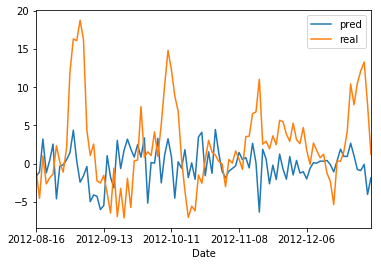


50% of the time we get the direction right

MAE TEST  : 4.22932677908
MSE TEST  : 35.442679473


In [44]:
print_results_report(Y_pred,Y_test)

# 4. LEARNING CURVE 

We use a learning curve to diagnose what went wrong.

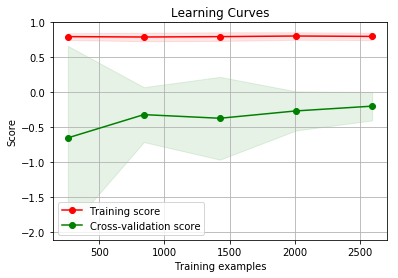

In [9]:
compute_learning_curve(clf,X_train,Y_train)

# MORE DATA

In [45]:
# i want the list of the files from there 
import os
tickers = os.listdir("/Users/edouardcuny/Desktop/quant/Carmela/data2/")
l = []
for ticker in tickers:
    if 'csv' in ticker:
        df = build_df(ticker)
        df.drop(df.columns[0], axis=1,inplace=True)
        l.append(df)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

In [46]:
df = pd.concat(l, axis=0)
# df.to_csv("/Users/edouardcuny/Desktop/stocks.csv")

In [47]:
# removing rows w/ infinite
df.replace([np.inf, -np.inf], np.nan,inplace=True)

# removing rows w/ NaN i.e. first rows and last rows based on window_size
df.dropna(inplace=True)

X_train,X_test,Y_train,Y_test = split_train_test(df)

In [48]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,Y_train)
Y_pred = pd.Series(clf.predict(X_test))
Y_pred.index = Y_test.index

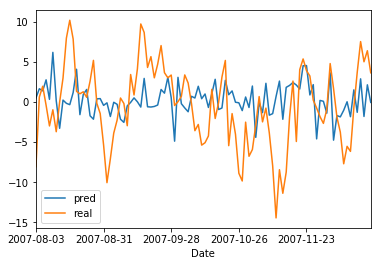


50% of the time we get the direction right

MAE TEST  : 7.59066079317
MSE TEST  : 25837.6529618


In [49]:
print_results_report(Y_pred,Y_test)

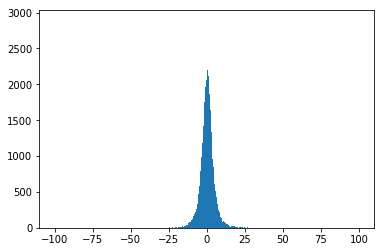

In [22]:
plt.hist(Y_train,range=(-100,100),bins=1000)
plt.show()

In [164]:
%run ./utils.py
GLE = build_df("GLE.PA.csv")

In [181]:
GLE.iloc[20:30,0]

Date
2000-01-31    24.067598
2000-02-01    24.254915
2000-02-02    24.617798
2000-02-03    23.950577
2000-02-04    23.482292
2000-02-07    23.330154
2000-02-08    23.412066
2000-02-09    22.826813
2000-02-10    23.025805
2000-02-11    23.224810
Name: Adj Close, dtype: float64

In [180]:
GLE.iloc[20:30,-9:]

,weighted_average,wa_spike,wa_pr_spike,wa_spike_derivative,exp_average,exp_spike,exp_pr_spike,exp_spike_derivative,y
Date,,,,,,,,,
2000-01-31,23.575444,1.020876,1.024041,-0.003165,23.87,1.008278,1.009904,-0.001626,-3.064053
2000-02-01,23.703429,1.023266,1.020876,0.002390,23.94,1.013154,1.008278,0.004876,-3.474962
2000-02-02,23.903471,1.029884,1.023266,0.006618,24.06,1.023184,1.013154,0.010029,-7.275163
2000-02-03,23.960444,0.999588,1.029884,-0.030296,24.04,0.996280,1.023184,-0.026903,-3.861168
2000-02-04,23.908412,0.982177,0.999588,-0.017411,23.94,0.980881,0.996280,-0.015399,-1.096494
2000-02-07,23.828295,0.979095,0.982177,-0.003082,23.83,0.979025,0.980881,-0.001857,-2.157470
2000-02-08,23.756235,0.985512,0.979095,0.006418,23.75,0.985771,0.979025,0.006747,-2.749851
2000-02-09,23.558280,0.968951,0.985512,-0.016562,23.58,0.968058,0.985771,-0.017713,2.205043
2000-02-10,23.407927,0.983676,0.968951,0.014725,23.48,0.980656,0.968058,0.012598,3.914460


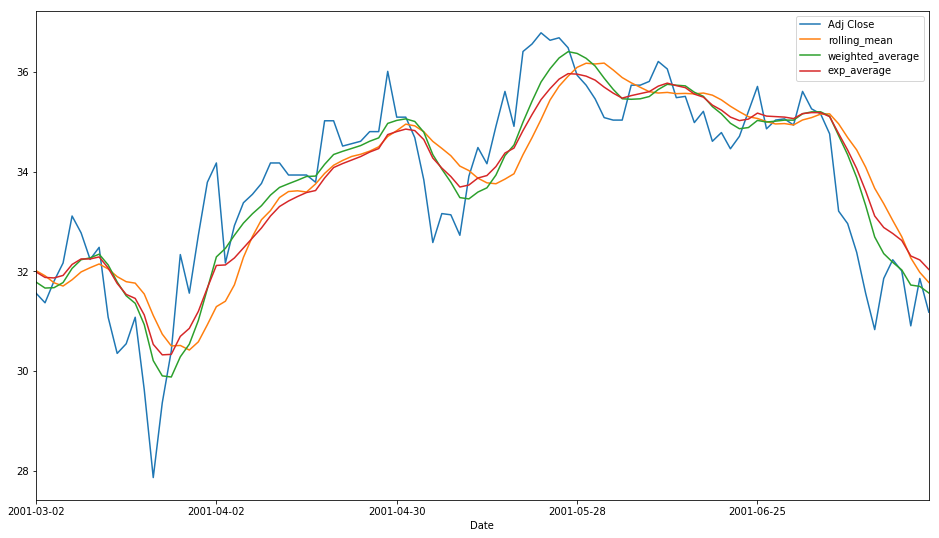

In [179]:
GLE.ix[300:400,['Adj Close','rolling_mean','weighted_average','exp_average']].plot()
plt.show()